In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('/Users/ifkar/rcads-pca')

In [3]:
os.getcwd()

'/Users/ifkar/rcads-pca'

In [4]:
rcads_dataset_1 = pd.read_csv('rcads_1.csv')
rcads_dataset_2 = pd.read_csv('rcads_2.csv')
rcads = rcads_dataset_1.merge(rcads_dataset_2, how='outer')
rcads_df = rcads.filter(items=['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16','q17','q18','q19','q20','q21','q22','q23','q24','q25','q26','q27','q28','q29','q30','q31','q32','q33','q34','q35','q36','q37','q38','q39','q40','q41','q42','q43','q44','q45','q46','q47'])
rcads_df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47
0,1,1.0,2,3.0,0,2,1,0,1.0,2,...,2,0,2,1,0,2,0,0,0,1
1,2,2.0,1,0.0,1,1,0,1,1.0,2,...,2,1,2,0,1,2,2,1,0,1
2,1,2.0,1,1.0,0,1,0,1,1.0,1,...,2,0,1,0,0,1,0,1,1,2
3,3,2.0,3,3.0,1,2,3,3,1.0,2,...,3,3,3,3,3,3,2,1,1,3
4,2,1.0,1,1.0,0,0,1,1,0.0,0,...,2,0,0,0,0,2,2,0,0,3


In [5]:
rcads_df_filtered = rcads_df.dropna()
rcads_df_filtered.describe()


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,...,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.00000,595.000000,595.000000
mean,1.729412,1.494118,1.238655,1.571429,0.512605,1.173109,1.317647,1.519328,0.714286,1.176471,...,1.315966,0.744538,1.235294,0.741176,0.635294,1.332773,0.635294,1.05042,0.381513,1.292437
std,0.850268,0.808966,0.996721,0.940766,0.794187,0.857890,0.997442,1.017132,0.862059,0.997025,...,1.136032,0.907479,0.896175,0.878226,0.879871,1.034840,0.838729,1.00377,0.741275,0.925796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.00000,1.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000


In [7]:
scaled_rcads = preprocessing.scale(rcads_df_filtered)
subscales = ['subscale 1','subscale 2','subscale 3','subscale 4','subscale 5','subscale 6']

In [8]:
pca = PCA()
pca.fit(scaled_rcads)
pca_data = pca.transform(scaled_rcads)

In [9]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

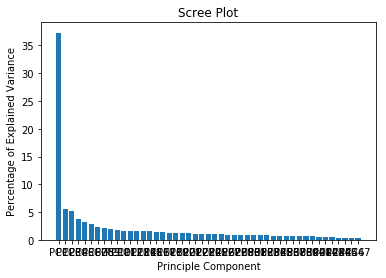

In [10]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

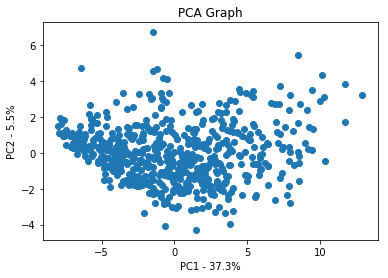

In [15]:
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()